<a href="https://colab.research.google.com/github/ninabohm/puig-xai/blob/main/limetest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lime 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os

from google.colab import drive
drive.mount('/content/drive')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=f56f6d1e082411aad8d1e3b23068b67e62053c7d0595fda92045a3efefa2a136
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime
Mounted at /content/drive


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/')
!ls

 Apartment		   'Family & Friends'	     Travel
 Archives		    Finance		     Work
'Business Administration'   Health		     Writing
'Colab Notebooks'	    sampledata_numeric.csv
 Dev			    sampledata_words.csv


In [ ]:
data=pd.read_csv('sampledata_numeric.csv')

In [ ]:
print(data.shape)

(22, 15)


In [ ]:
data.head()

,Age,Gender,Race,Education,Years of Experience,Industry,Position,Technical Skills,Language Fluency,Certifications,Resume Length,Interview Score,Referral,Job Fit,Hired
0,32,0,4,3,2,5,6,2,1,5,3,85,0,3,1
1,31,1,2,4,1,7,2,1,1,0,2,75,0,3,0
2,30,0,0,1,0,4,4,0,1,0,1,70,0,2,0
3,29,1,4,5,5,3,6,0,1,3,6,100,1,4,1
4,28,0,3,3,2,1,1,0,1,4,2,85,0,3,1


In [ ]:
y = data.Hired[0:52]

base_features = [c for c in data.columns if c != "Hired"]
X = data.iloc[0:52, 0:14].astype(int)
print(X.shape)
X.head()

(22, 14)


,Age,Gender,Race,Education,Years of Experience,Industry,Position,Technical Skills,Language Fluency,Certifications,Resume Length,Interview Score,Referral,Job Fit
0,32,0,4,3,2,5,6,2,1,5,3,85,0,3
1,31,1,2,4,1,7,2,1,1,0,2,75,0,3
2,30,0,0,1,0,4,4,0,1,0,1,70,0,2
3,29,1,4,5,5,3,6,0,1,3,6,100,1,4
4,28,0,3,3,2,1,1,0,1,4,2,85,0,3


In [ ]:
RANDOM_STATE=23
train_X, val_X, train_y, val_y, = train_test_split(X, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE)
my_model = RandomForestClassifier(max_depth=4, random_state=RANDOM_STATE).fit(train_X, train_y)
num = 1 #we will explain this sample
test_sample = val_X.iloc[num,:]

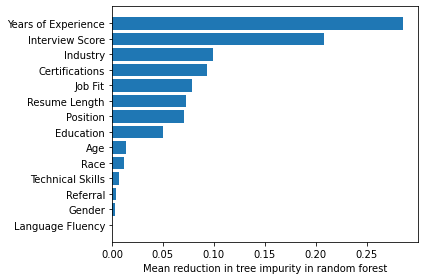

In [ ]:
imp_df = pd.DataFrame({'feature': train_X.columns.values, 'importance': my_model.feature_importances_})

#Reorder by importance
ordered_df = imp_df.sort_values(by='importance')
imp_range=range(1, len(imp_df.index)+1)

height = ordered_df['importance']
bars = ordered_df['feature']
y_pos = np.arange(len(bars))

plt.barh(y_pos, height)

plt.yticks(y_pos, bars)

plt.xlabel("Mean reduction in tree impurity in random forest")

plt.tight_layout()

plt.show()

Random Forest Predicition for sample 1 = [0.96 0.04]
Actual outcome =  0


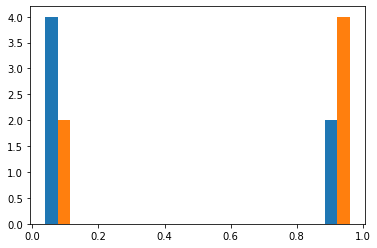

In [ ]:
out = my_model.predict_proba(val_X)
plt.hist(out)
print("Random Forest Predicition for sample", num, '=', out[num])
print('Actual outcome = ', val_y.iloc[num])

In [ ]:
import lime 
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=train_X.values,
    feature_names=train_X.columns.values,
    class_names=['No_Hired', 'Yes_Hired'],
    mode='classification',
    verbose=True,
    random_state=RANDOM_STATE
)

lime_exp = lime_explainer.explain_instance(
    data_row=test_sample,
    predict_fn=my_model.predict_proba, num_features=20
)


Intercept 0.9939013150700697
Prediction_local [0.1800683]
Right: 0.04


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


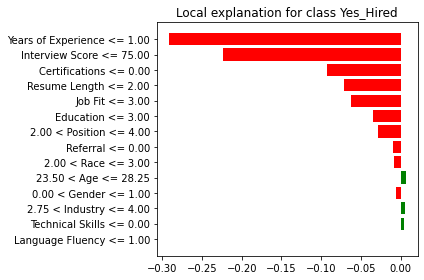

In [ ]:
plt = lime_exp.as_pyplot_figure()
plt.tight_layout()